In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# # Change working Directory

# df1=pd.read_excel("D:/26_October_2022/GL-M.Tech.-TSF/Exponential_Smoothing_Data_Univ_exam.xlsx")##, sheet_name='')
xlsx_file=pd.ExcelFile("D:/26_October_2022/GL-M.Tech.-TSF/v1_Exponential_Smoothing_Data_Univ_exam.xlsx")##, sheet_name='')

xlsx_file_sheets=xlsx_file.sheet_names
print(xlsx_file_sheets)
# ##['SES-1', 'SES-3', 'New']
df1=pd.read_excel("D:/26_October_2022/GL-M.Tech.-TSF/v1_Exponential_Smoothing_Data_Univ_exam.xlsx", sheet_name='New')
print(df1)
print(df1.xt)
df2=pd.read_excel("D:/26_October_2022/GL-M.Tech.-TSF/v1_Exponential_Smoothing_Data_Univ_exam.xlsx", sheet_name='Sheet1')
print(df2)
print(df2.xt)




['Sheet1', 'New', 'SES-1', 'SES-3']
      t     xt
0  2001  33.48
1  2002  39.02
2  2003  41.30
3  2004  41.60
4  2005  44.60
5  2006  46.90
6  2007  48.70
7  2008  51.40
8  2009  50.00
9  2010  60.60
0    33.48
1    39.02
2    41.30
3    41.60
4    44.60
5    46.90
6    48.70
7    51.40
8    50.00
9    60.60
Name: xt, dtype: float64
    t  xt
0   1  10
1   2  14
2   3   8
3   4  25
4   5  16
5   6  22
6   7  14
7   8  35
8   9  15
9  10  27
0    10
1    14
2     8
3    25
4    16
5    22
6    14
7    35
8    15
9    27
Name: xt, dtype: int64


Shape of the dataframe: (10, 2)
Shape of the dataframe: (10, 2)
modified_df2
     t  xt  des_0.1_0.4  des_0.1_0.5  des_0.1_0.6  des_0.2_0.4  des_0.2_0.5  \
0   1  10    10.000000    10.000000    10.000000    10.000000    10.000000   
1   2  14    18.000000    18.000000    18.000000    18.000000    18.000000   
2   3   8    20.600000    20.500000    20.400000    19.200000    19.000000   
3   4  25    24.816000    24.675000    24.536000    24.024000    23.800000   
4   5  16    27.357760    27.098750    26.846240    25.441280    25.060000   
5   6  22    30.031034    29.625188    29.234682    27.499802    26.962000   
6   7  14    30.995738    30.317722    29.670198    26.466635    25.587400   
7   8  35    34.124143    33.275117    32.481951    30.522770    29.628980   
8   9  15    34.174742    33.023016    31.963612    28.525857    27.399346   
9  10  27    35.133291    33.694975    32.399290    29.206258    27.975704   

   des_0.2_0.6  des_0.3_0.4  des_0.3_0.5  des_0.3_0.6  
0    10

Text(0.5, 1.0, 'Double Smoothing Forecast')

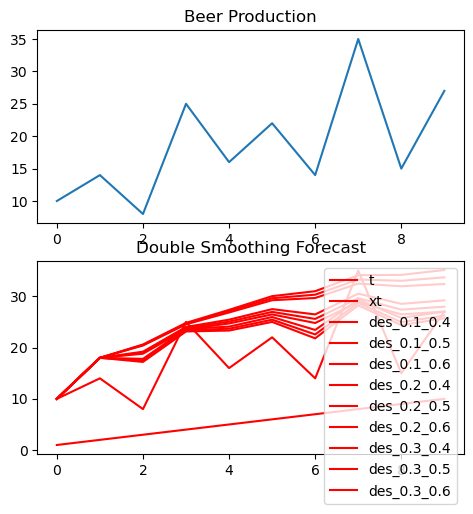

In [2]:

#Display shape of the dataset
print('Shape of the dataframe:', df1.shape)
df1.head()

#Display shape of the dataset
print('Shape of the dataframe:', df2.shape)
df2.head()

# #Rename the 2nd column
# df1.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
#                         'Beer_Prod'
#                        },
#                inplace=True
#               )

# #Remove missing values
# missing = (pd.isnull(df1['Quarter'])) | (pd.isnull(df1['xt']))
# print('Number of rows with at least one missing values:', missing.sum())
# df1 = df1.loc[~missing, :]
# print('Shape after removing missing values:', df1.shape)


# Function for Sigle exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat


# def double_exp_smoothing(x, alpha, beta):
#     yhat = [x[0]]  # first value is same as series
#     for t in range(1, len(x)):
#         if t == 1:
#             F, T = x[0], x[1] - x[0]
#         F_n_1, F = F, alpha * x[t] + (1 - alpha) * (F + T)
#         T = beta * (F - F_n_1) + (1 - beta) * T
#         yhat.append(F + T)
#     return yhat

# # Data
# x = [33.48, 39.02, 41.3, 41.6, 44.6, 46.9, 48.7, 51.4, 50.0, 60.6]

# Alpha and Beta values to test
alphas = [0.1, 0.2, 0.3]
betas = [0.4, 0.5, 0.6]

# Run the function for each combination of alpha and beta
for alpha in alphas:
    for beta in betas:
        # column_name = f'des_alpha_{alpha}_beta_{beta}'
        column_name = f'des_{alpha}_{beta}'
        df2[column_name] = double_exp_smoothing(df2['xt'], alpha, beta)

# Print the DataFrame with all results
print('modified_df2\n',df2)
#         # yhat = double_exp_smoothing(x, alpha, beta)
#         df2['des_value'] = double_exp_smoothing(df2['xt'], alpha, beta)
#         print(f"Alpha: {alpha}, Beta: {beta}")
#         print("Forecasts:", df2)
#         print()

# # df1['des_value'] = double_exp_smoothing(df1['xt'], 0.9, 0.9)




# print('revised_df2\n',df2)

### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
df2['xt'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
# df2['des_value'].plot(ax=ax, color='r')
df2.plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
# plt.savefig('plots/ch2/B07887_03_14.png', format='png', dpi=300)


modified_df1
       t     xt    ses_0.1    ses_0.2    ses_0.3
0  2001  33.48  33.480000  33.480000  33.480000
1  2002  39.02  34.034000  34.588000  35.142000
2  2003  41.30  34.760600  35.930400  36.989400
3  2004  41.60  35.444540  37.064320  38.372580
4  2005  44.60  36.360086  38.571456  40.240806
5  2006  46.90  37.414077  40.237165  42.238564
6  2007  48.70  38.542670  41.929732  44.176995
7  2008  51.40  39.828403  43.823785  46.343896
8  2009  50.00  40.845562  45.059028  47.440728
9  2010  60.60  42.821006  48.167223  51.388509


Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

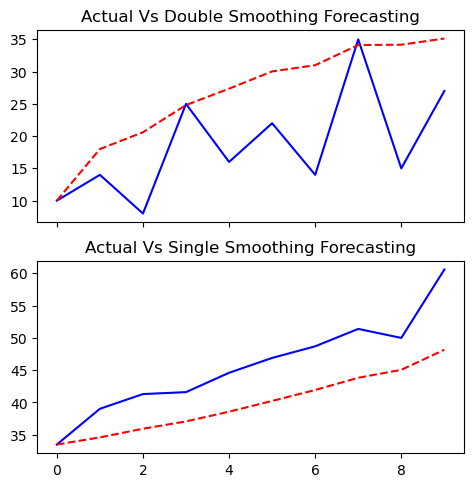

In [3]:

# Single vs Double Forecast value
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

# Alpha and Beta values to test
alphas = [0.1, 0.2, 0.3]
# betas = [0.4, 0.5, 0.6]

# Run the function for each combination of alpha and beta
for alpha in alphas:
    # for beta in betas:
    # yhat = double_exp_smoothing(x, alpha, beta)
    # df1['Single_Exponential_Forecast'] = single_exp_smoothing(df1['xt'], alpha)
    # # print(f"Alpha: {alpha}, Beta: {beta}")
    # print("Forecasts:", yhat)
    # print()
    # column_name = f'des_alpha_{alpha}_beta_{beta}'
    column_name = f'ses_{alpha}'
    df1[column_name] = single_exp_smoothing(df1['xt'], alpha)

# Print the DataFrame with all results
print('modified_df1\n',df1)


# for alp in range(0,1,0.1)
# df1['Single_Exponential_Forecast'] = single_exp_smoothing(df1['xt'], 0.55)


# print('revised_df1\n',df1)

### Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
df2['xt'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
df2['des_0.1_0.4'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

df1['xt'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
# df1['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
df1['ses_0.2'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')


KeyError: 'Single_Exponential_Forecast'

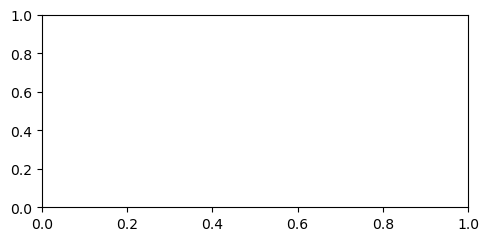

In [4]:

# Plot single and double exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
df1['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
df1['des_value'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
# plt.savefig('plots/ch2/B07887_03_14.png', format='png', dpi=300)



In [ ]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# # Change working Directory
# os.chdir('C:/Users/pp9596/Documents/02 ZSP/00 PACKT/Book - Practical Time-Series Analysis/Avishek')

# #read the data from into a pandas.DataFrame
# df2 = pd.read_csv('datasets/wisconsin-employment-time-series.csv')



# df1=pd.read_excel("D:/26_October_2022/GL-M.Tech.-TSF/Exponential_Smoothing_Data_Univ_exam.xlsx")##, sheet_name='')
xlsx_file=pd.ExcelFile("D:/26_October_2022/GL-M.Tech.-TSF/v1_Exponential_Smoothing_Data_Univ_exam.xlsx")##, sheet_name='')

xlsx_file_sheets=xlsx_file.sheet_names
print(xlsx_file_sheets)
# ##['SES-1', 'SES-3', 'New']
df1=pd.read_excel("D:/26_October_2022/GL-M.Tech.-TSF/Exponential_Smoothing_Data_Univ_exam.xlsx", sheet_name='SES-1')
print(df1)
print(df1.xt)
df2=pd.read_excel("D:/26_October_2022/GL-M.Tech.-TSF/v1_Exponential_Smoothing_Data_Univ_exam.xlsx", sheet_name='SES-3')
print(df2)
print(df2.xt)


#Display shape of the dataset
print('Shape of the dataframe:', df1.shape)
df1.head()

#Display shape of the dataset
print('Shape of the dataframe:', df2.shape)
df2.head()



#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', df2.shape)

#Let's see first 10 rows of it
df2.head()

# plot the wisconsin employment dataset
df2.plot()


In [ ]:

# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

initialize_T(df2['xt'], 1)

# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))

    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

initialize_seasonalilty(df2['xt'], 12)


# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

# Triple exponential smoothing
df2['TES_value']=triple_exp_smoothing(df2['xt'], 1, 0.91, 0.71, 0.81, 0)
# df1['des_value'] = double_exp_smoothing(df1['xt'], 0.1, 0.1)

print('revised_df2\n',df2)



In [ ]:

### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
df2['xt'].plot(ax=ax)
ax.set_title('Beer Production')
# ax = fig.add_subplot(2,1,2)
df2['TES_value'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')
# plt.savefig('plots/ch2/B07887_03_14.png', format='png', dpi=300)